# Code to plot SI7

In [2]:
## imports (generic)
import warnings
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## generate settings for file path

In [3]:
## input data 
path_data = '../data/'
## set path for storing the figure made by this file
path_fig = '../fig/'

## read in data

In [5]:
# prepare the data
TMP = xr.open_dataset(path_data + 'ds_SI7.nc')
ds = TMP.copy(deep=True)
ds

<xarray.Dataset>
Dimensions:    (mod_Epeat: 5, scen: 4, reg_pt: 4, year: 439)
Coordinates:
  * mod_Epeat  (mod_Epeat) object 'LPJ' 'LPX' ... 'ORCHIDEE'
  * scen       (scen) object 'ctrl' 'rcp85-bgc' 'rcp26' 'rcp85'
  * reg_pt     (reg_pt) object 'North America (permafrost)' ... 'Eurasia (non...
  * year       (year) int64 1861 1862 1863 1864 1865 ... 2296 2297 2298 2299
Data variables:
    nbp_ref    (year, reg_pt, mod_Epeat, scen) float64 ...
    nbp_mod    (year, reg_pt, mod_Epeat, scen) float64 ...

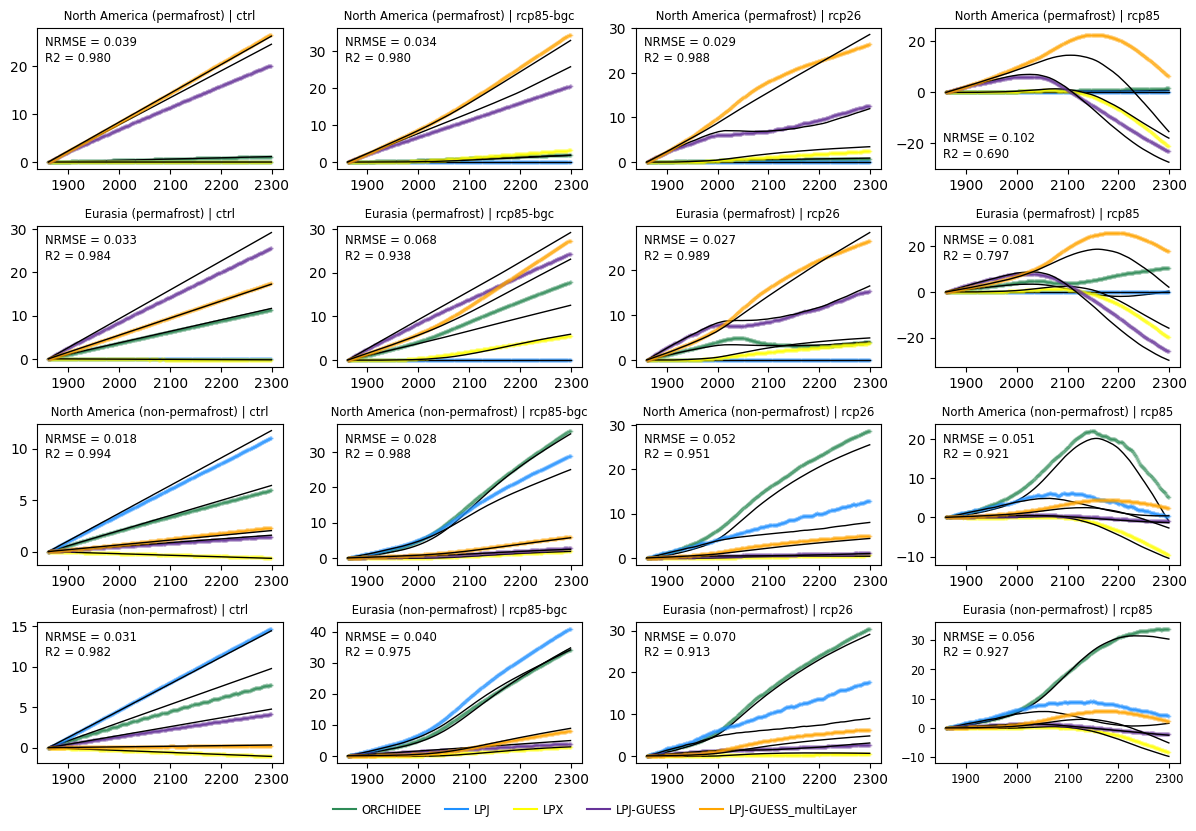

In [45]:
colors_mod = {'LPJ':'dodgerblue', 'LPX':'yellow', 'LPJ-GUESS':'rebeccapurple', 'LPJ-GUESS_multiLayer':'orange', 'ORCHIDEE':'seagreen'}
mod_lst = ['ORCHIDEE', 'LPJ', 'LPX','LPJ-GUESS','LPJ-GUESS_multiLayer']
fig, axes = plt.subplots(4, 4, figsize=(12,8))
for n_reg, reg in enumerate(ds.reg_pt):
    for n_scen, scen in enumerate(ds.scen.values):
        for n_mod, mod in enumerate(ds.sel(mod_Epeat = mod_lst).mod_Epeat):
            get_var = lambda da, scen:  da.sel(model=mod.values, scen=['historical' + '-alt'*('-alt' in scen) + '-bgc'*('-bgc' in scen), scen] if scen != 'ctrl' else [scen]).mean('scen')
            get_var0 = lambda da, scen: (da.sel(model=mod.values, scen='ctrl', drop=True) + ('-alt' in scen) * (da.sel(scen='historical-alt') - da.sel(scen='historical'))).mean()
            y_ref = ds.nbp_ref.sel(reg_pt=reg, scen=scen, mod_Epeat=mod)
            y_mod = ds.nbp_mod.sel(reg_pt=reg, scen=scen, mod_Epeat=mod)
            # plot the data
            axes[n_reg, n_scen].plot(ds.year, y_ref, ls='none', marker='+', ms=3, alpha=0.3, color=colors_mod[mod.item()])
            axes[n_reg, n_scen].plot(ds.year, y_mod, color='k', lw=1)
        # Calculate RMSE
        y_ref = ds.nbp_ref.sel(reg_pt=reg, scen=scen)
        y_mod = ds.nbp_mod.sel(reg_pt=reg, scen=scen)
        rmse = np.sqrt(np.mean((y_ref - y_mod) ** 2))
        # Calculate R²
        ss_res = np.sum((y_ref - y_mod) ** 2)  # Residual sum of squares
        ss_tot = np.sum((y_ref - np.mean(y_ref)) ** 2)  # Total sum of squares
        r2 = 1 - (ss_res / ss_tot)
        nrmse = rmse / (y_ref.max() - y_ref.min())
        # add RMSE and R² to the plot
        for name, val in zip(['NRMSE', 'R2'], [nrmse, r2]): 
            axes[n_reg, n_scen].plot([np.nan], [np.nan], label='{0} = {1:.3f}'.format(name, val))
        axes[n_reg, n_scen].legend(loc=0, ncol=1, handlelength=0, handletextpad=0, borderpad=0.2, labelspacing=0.2, frameon=False, fontsize='small')
        # add subplot title
        axes[n_reg, n_scen].set_title(r' {0} | {1} | {2} '.format(reg.values, scen, mod), fontsize='small')
        # add subplot title
        axes[n_reg, n_scen].set_title(r' {0} | {1} '.format(reg.values, scen), fontsize='small')
        # set the y-axis label
        plt.yticks(fontsize='small')
        plt.xticks(fontsize='small')
# Manually create legend handles for each model (mod_lst)
handles = [plt.Line2D([], [], color=colors_mod[mod], label=mod) for mod in mod_lst]
# Add the legend below the subplots
# Add the legend below the subplots
fig.legend(handles=handles, loc='lower center', ncol=len(mod_lst), fontsize='small', bbox_to_anchor=(0.5, -0.04), frameon=False,handletextpad=0.5)
plt.tight_layout()
plt.subplots_adjust(bottom=0.04) 
# save the figure
plt.savefig(path_fig + 'fig_SI7.png', dpi=300, bbox_inches='tight')
plt.savefig(path_fig + 'fig_SI7.pdf', bbox_inches='tight')
plt.show()